In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
# data
path_X = 'nuclear_x.csv'
path_y = 'nuclear_y.csv'
path=[path_X,path_y]

for i in range(2):
    with open(path[i], encoding='utf-8') as f:
        if i ==0:
            X = np.loadtxt(path[i],delimiter=',') #20000,2
        else:
            y = np.loadtxt(path[i], delimiter=',').reshape(-1,1)

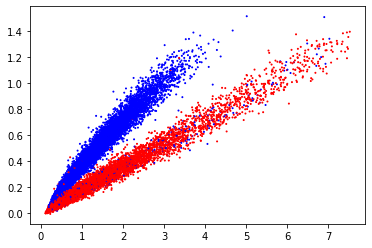

In [3]:
# visualization
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=['red' if label == -1 else 'blue' for label in y],s=1)

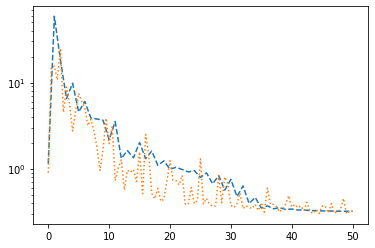

In [4]:
def subgrad(X_aug,y,theta,lam=0.001):
    n = len(X_aug)
    # n = 20000
    w = np.concatenate((np.zeros((1,1)),theta[1:,:].T),axis=1).T # 3,1 [b;w1;w2]
    mask = y*np.dot(X_aug,theta) <= 1 #20000,1
    grad = -((mask*y*X_aug).sum(0)).reshape(-1,1) + n*lam*w#20000,3
    return grad/n

def subgrad_descent(X,y,batch_size,epochs):
    # np.random.seed(42)
    X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

    w = np.random.rand(2,1)
    b = np.random.randn(1).reshape(-1,1)
    
    theta = np.concatenate((b,w.T),axis=1).T
    thetas=[theta.copy()]

    for j in range(1,epochs+1):
        step_size = 100/j
        indices = list(np.arange(X.shape[0]))
        np.random.shuffle(indices)

        for k in range(0,len(X),batch_size):
            batch_indices = indices[k:k+batch_size]
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            grad = subgrad(X_batch,y_batch,theta)
            theta = theta - step_size*grad
            thetas.append(theta.copy())
    return thetas

def loss(X,y,thetas,lam=0.001):
    ls = []
    thetas = np.array(thetas)
    for w,b in zip(thetas[:,1:,:],thetas[:,0,:]):
        t = np.dot(X,w)+b
        L = np.maximum(0,1-y*t)
        ls.append(L.mean()+(lam/2)*np.linalg.norm(w)**2)
    return ls

fig,ax = plt.subplots()
# subgradient
thetas = subgrad_descent(X,y,batch_size=20000,epochs=50)
Js = loss(X,y,thetas)
ax.plot(np.arange(len(Js)), Js, '--', label='SGM')

thetas_sto = subgrad_descent(X,y,batch_size=100,epochs=50)
Js_sto = loss(X,y,thetas_sto[::100])
ax.plot(np.arange(len(Js_sto)) / X.shape[0]*10000, Js_sto, ':', label='SGM')

plt.yscale('log')


In [5]:
thetas[-1],thetas_sto[-1]

(array([[-1.01738535],
        [-3.30157352],
        [16.26431679]]),
 array([[-1.14657651],
        [-2.90915553],
        [13.8630873 ]]))